[<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"> ](https://colab.research.google.com/github/Upeshjeengar/Stock-Price-Prediction/blob/main/Stock_Price_Prediction_with_ARIMA.ipynb)


Time Series Forecasting means analyzing and modeling time-series data to make future decisions. Some of the applications of Time Series Forecasting are weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc. The ARIMA model is a popular statistical technique used for Time Series Forecasting. If you want to learn Time Series Forecasting with ARIMA, this article is for you. In this article, I will take you through the task of Time Series Forecasting with ARIMA using the Python programming language.



## What is ARIMA?

ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

1. p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
2. d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
3. q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

I hope you have now understood the ARIMA model. In the section below, I will take you through the task of Time Series Forecasting of stock prices with ARIMA using the Python programming language.

## Time Series Forecasting with ARIMA

Now let’s start with the task of Time Series Forecasting with ARIMA. I will first collect Google stock price data using the Yahoo Finance API. If you have never used Yahoo Finance API, you can learn more about it here.

Now here’s how to collect data about the Google’s Stock Price:

In [45]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

# d1 = today.strftime("%Y-%m-%d")
d1 = date.today()-timedelta(days=10)
d1 = d1.strftime("%Y-%m-%d")

end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

stock_to_predict='HDFCLIFE.NS'

data = yf.download(stock_to_predict,
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
231 2024-08-16  664.650024  690.599976  664.650024  689.400024  689.400024   
232 2024-08-19  689.400024  689.400024  678.500000  685.700012  685.700012   
233 2024-08-20  687.000000  713.000000  684.049988  710.599976  710.599976   
234 2024-08-21  714.349976  727.599976  708.650024  724.549988  724.549988   
235 2024-08-22  726.000000  729.900024  720.049988  726.000000  726.000000   

      Volume  
231  4584181  
232  2352893  
233  6828474  
234  6186935  
235  3889249  


We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:

In [46]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2023-09-04  640.049988
1 2023-09-05  640.950012
2 2023-09-06  647.549988
3 2023-09-07  656.750000
4 2023-09-08  657.450012


Now let’s visualize the close prices of Google before moving forward:

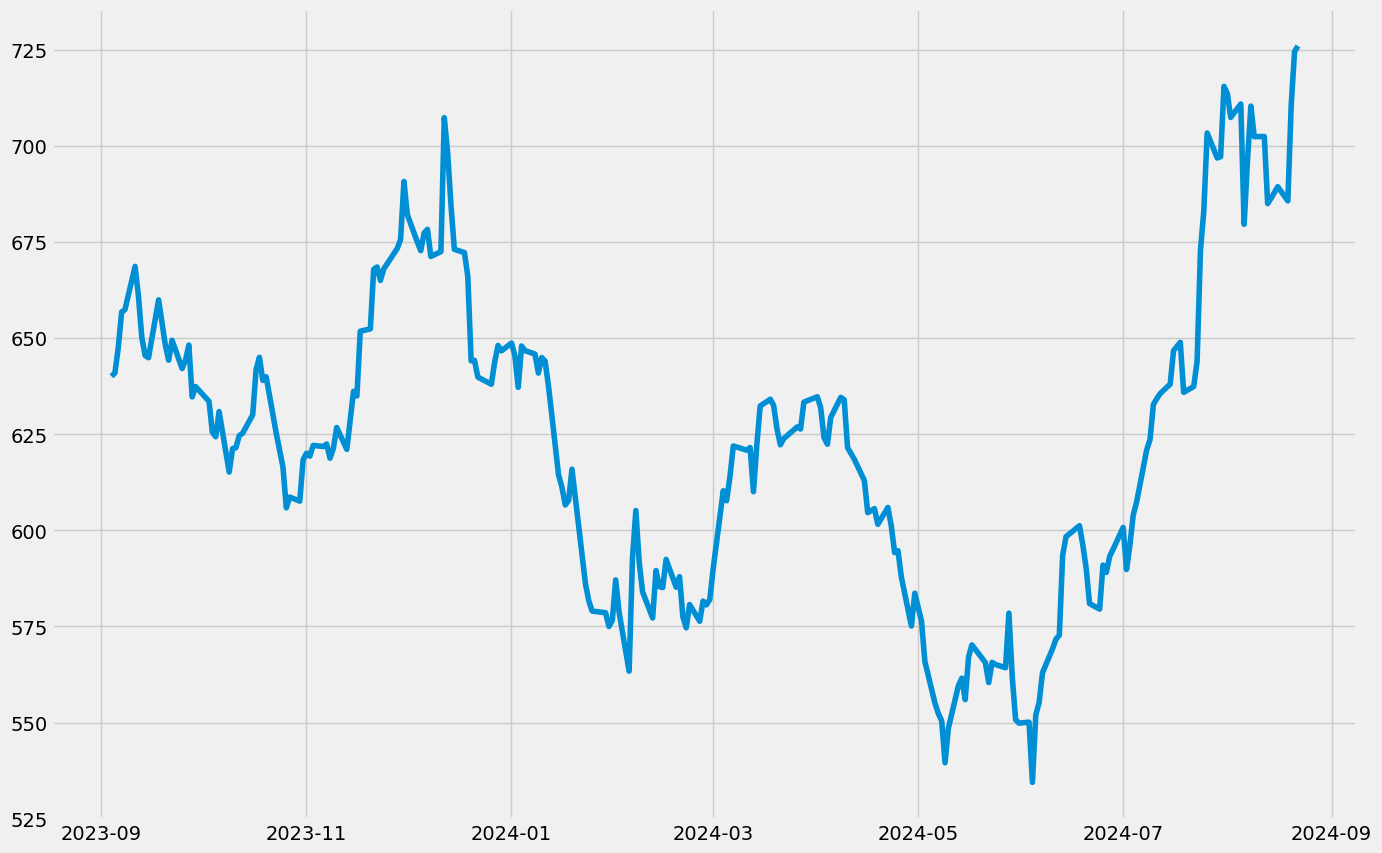

In [47]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

## Using ARIMA for Time Series Forecasting

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

<Figure size 640x480 with 0 Axes>

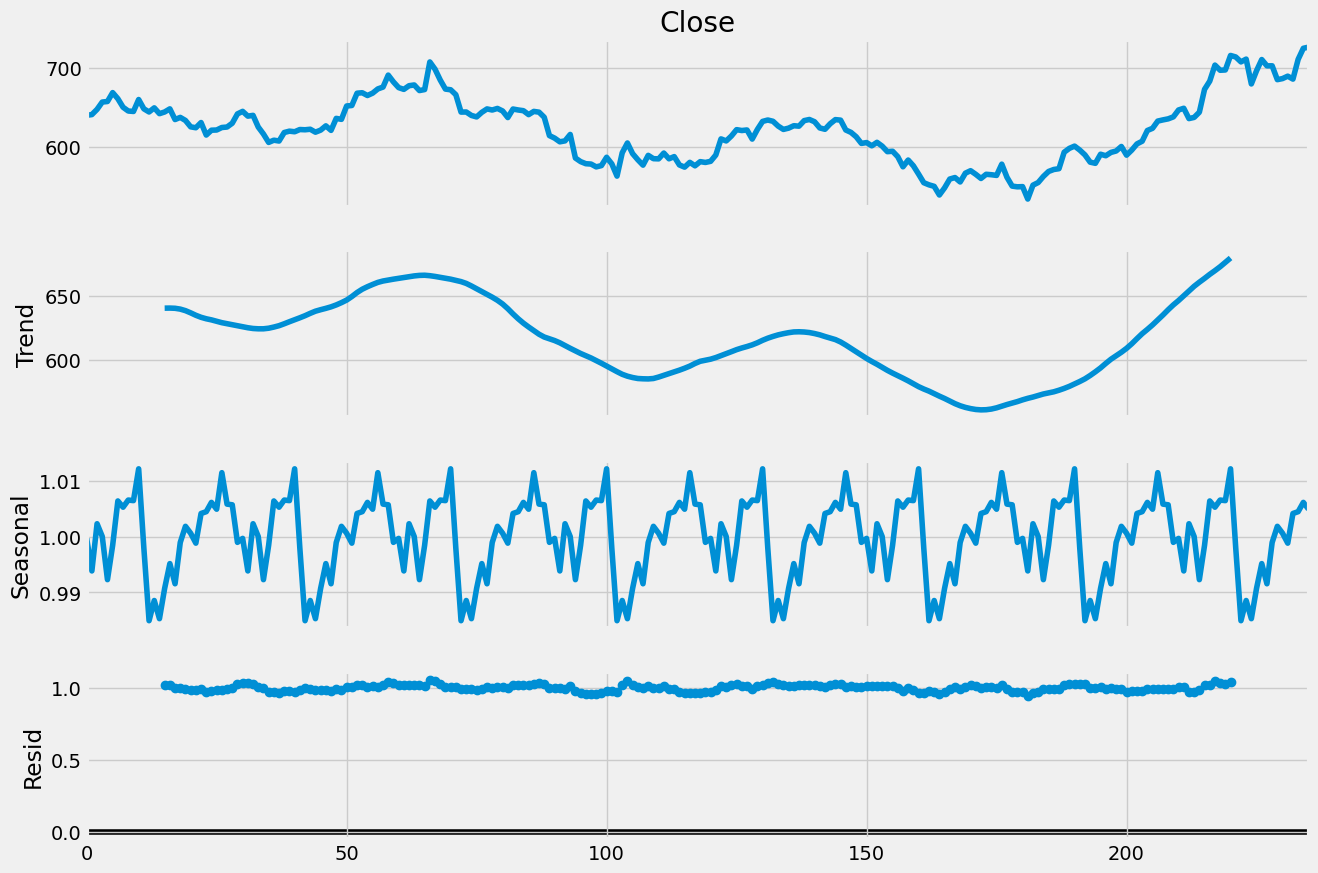

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

Now here’s how to find the value of p:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

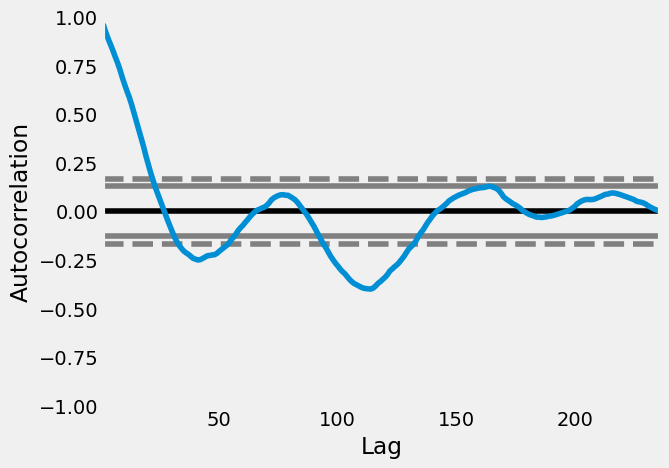

In [49]:
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

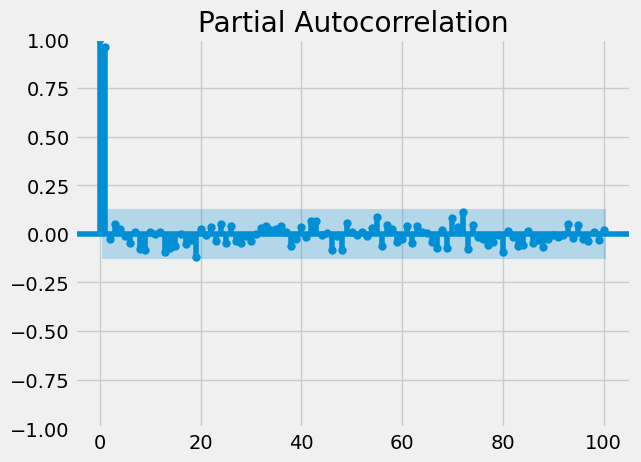

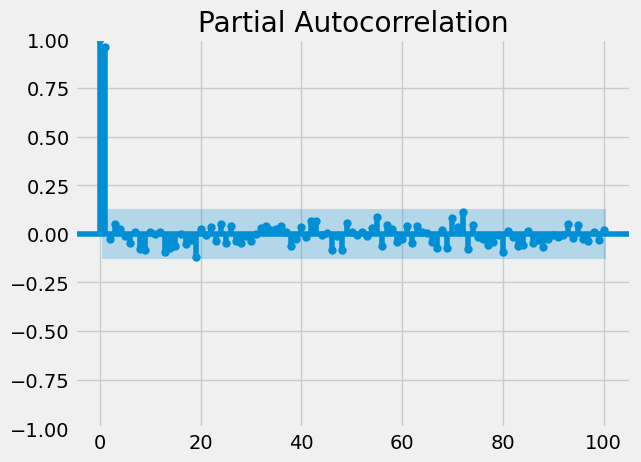

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:

In [51]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))
# Fit the model
fitted = model.fit()
# Set the display option
fitted.params['disp'] = -1
# Print the summary
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  236
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -850.396
Date:                Mon, 02 Sep 2024   AIC                           1716.792
Time:                        05:07:35   BIC                           1744.469
Sample:                             0   HQIC                          1727.950
                                - 236                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1938      0.086    -13.900      0.000      -1.362      -1.025
ar.L2         -0.8865      0.121     -7.319      0.000      -1.124      -0.649
ar.L3          0.0427      0.131      0.326      0.7

Here’s how to predict the values using the ARIMA model:

In [52]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      640.050629
2      640.958593
3      647.602760
4      656.714432
          ...    
231    688.325845
232    683.732792
233    691.180180
234    709.031728
235    722.906849
Name: predicted_mean, Length: 236, dtype: float64


The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [53]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  236
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -821.817
Date:                            Mon, 02 Sep 2024   AIC                           1673.633
Time:                                    05:08:31   BIC                           1724.741
Sample:                                         0   HQIC                          1694.265
                                            - 236                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1487      0.092    -12.431      0.000      -1.330      -0.968
ar.L2         -0.8939      0.125   

Now let’s predict the future stock prices using the SARIMA model for the next 10 days:



In [54]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

236    727.728035
237    724.681723
238    731.627577
239    734.003209
240    726.744111
241    731.051699
242    733.068075
243    729.196870
244    734.063987
245    734.568297
246    736.786178
Name: predicted_mean, dtype: float64


Here’s how you can plot the predictions:



<Axes: >

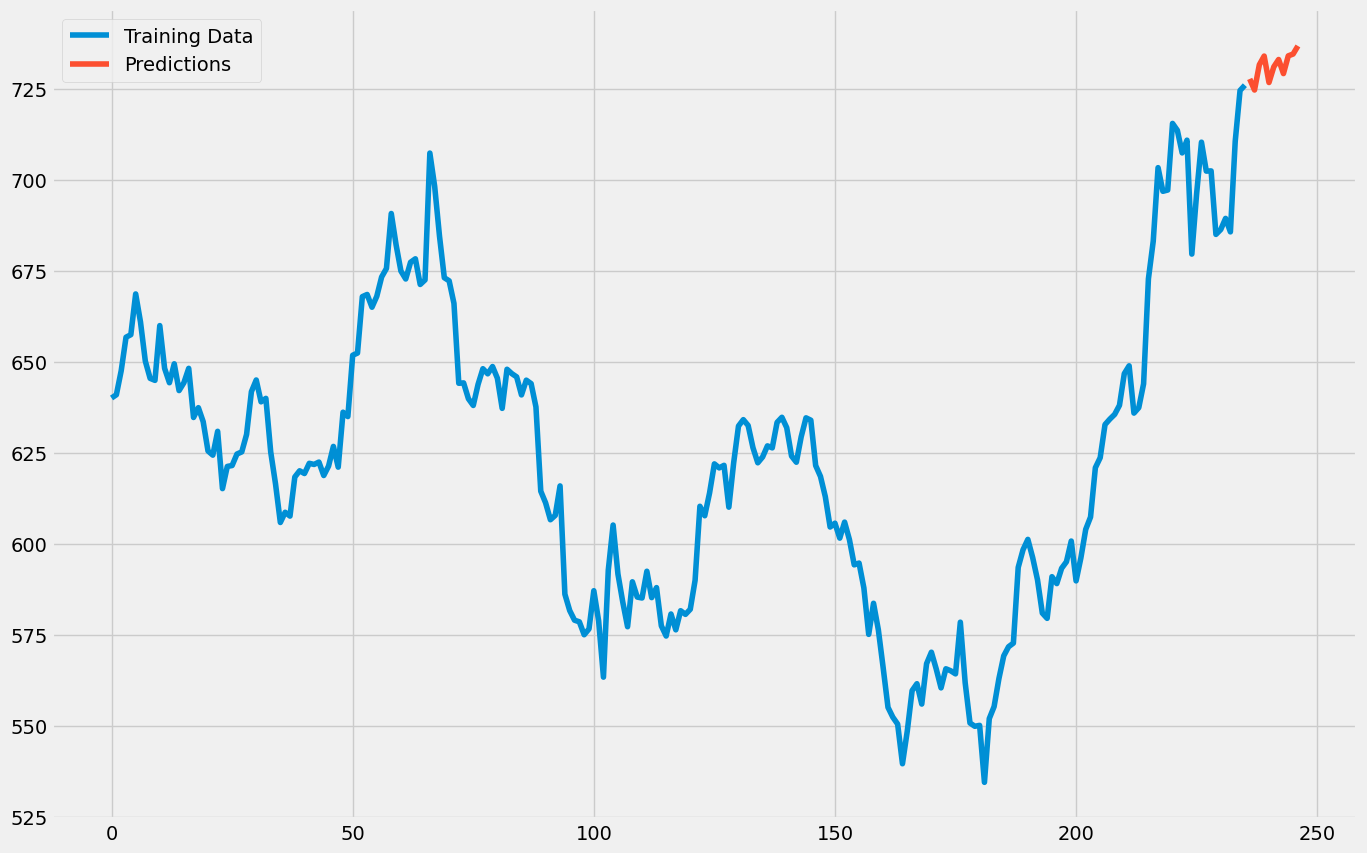

In [55]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

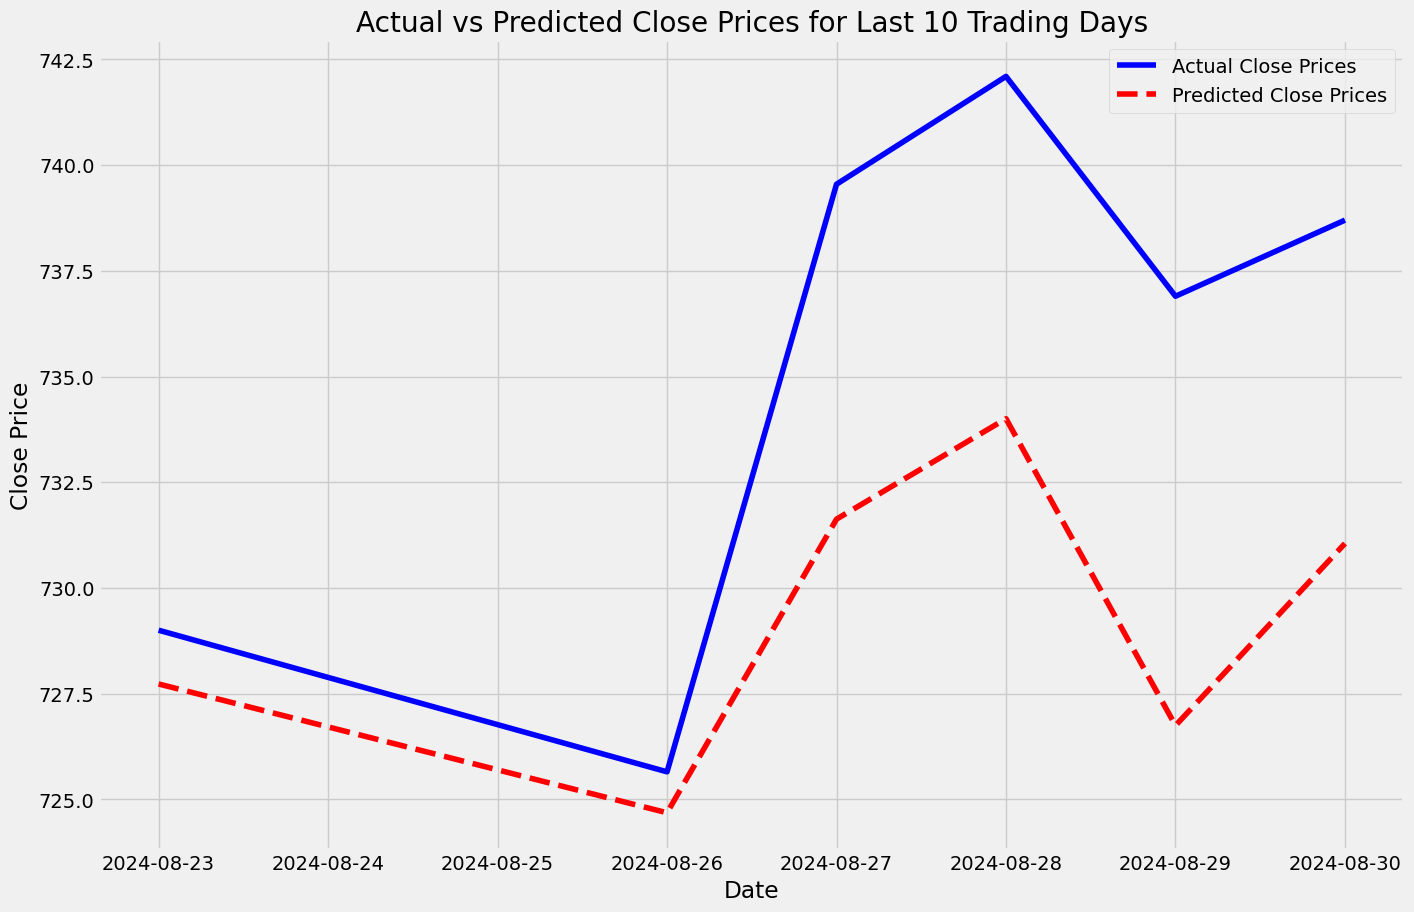

In [56]:
# Define today's date and the date 10 days ago
today = date.today()
d1 = today - timedelta(days=10)
d1_str = d1.strftime("%Y-%m-%d")

# Download the actual stock data for the last 10 trading days
actual_data = yf.download(stock_to_predict, start=d1_str, end=today.strftime("%Y-%m-%d"), progress=False)
actual_data["Date"] = actual_data.index
actual_data = actual_data[["Date", "Close"]]
actual_data.reset_index(drop=True, inplace=True)

# Use the trained model to predict the last 10 trading days
predictions = model.predict(len(data), len(data) + len(actual_data) - 1)

# Plotting the actual vs predicted values
plt.figure(figsize=(15, 10))
plt.plot(actual_data['Date'], actual_data['Close'], label="Actual Close Prices", color='blue')
plt.plot(actual_data['Date'], predictions, label="Predicted Close Prices", color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices for Last 10 Trading Days')
plt.legend()
plt.show()

So this is how we can use ARIMA or SARIMA models for Time Series Forecasting using Python.

## Summary
ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA). I hope you liked this article about Time Series Forecasting with ARIMA using Python. Feel free to ask valuable questions in the comments section below.